In [1]:
from configs.config import Config
config = Config()

In [2]:
from data.data_loader import DataLoader
loader = DataLoader(config)

In [3]:
df = loader.load_data()

In [4]:
df.head()

,news,price_direction_up,price_direction_constant,price_direction_down,asset_comparision,past_information,future_information
0,"april gold down 20 cents to settle at $1,116.1...",0,0,1,0,1,0
1,gold suffers third straight daily decline,0,0,1,0,1,0
2,Gold futures edge up after two-session decline,1,0,0,0,1,0
3,dent research : is gold's day in the sun comin...,0,0,0,0,0,1
4,"Gold snaps three-day rally as Trump, lawmakers...",0,0,1,0,1,0


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## Dataset Overview

In [6]:
# Dataset shape and basic statistics
print(f"Dataset shape: {df.shape}")
print(f"\nMissing values:\n{df.isnull().sum()}")

Dataset shape: (10570, 7)

Missing values:
news                        0
price_direction_up          0
price_direction_constant    0
price_direction_down        0
asset_comparision           0
past_information            0
future_information          0
dtype: int64


## Distribution of Target Variables

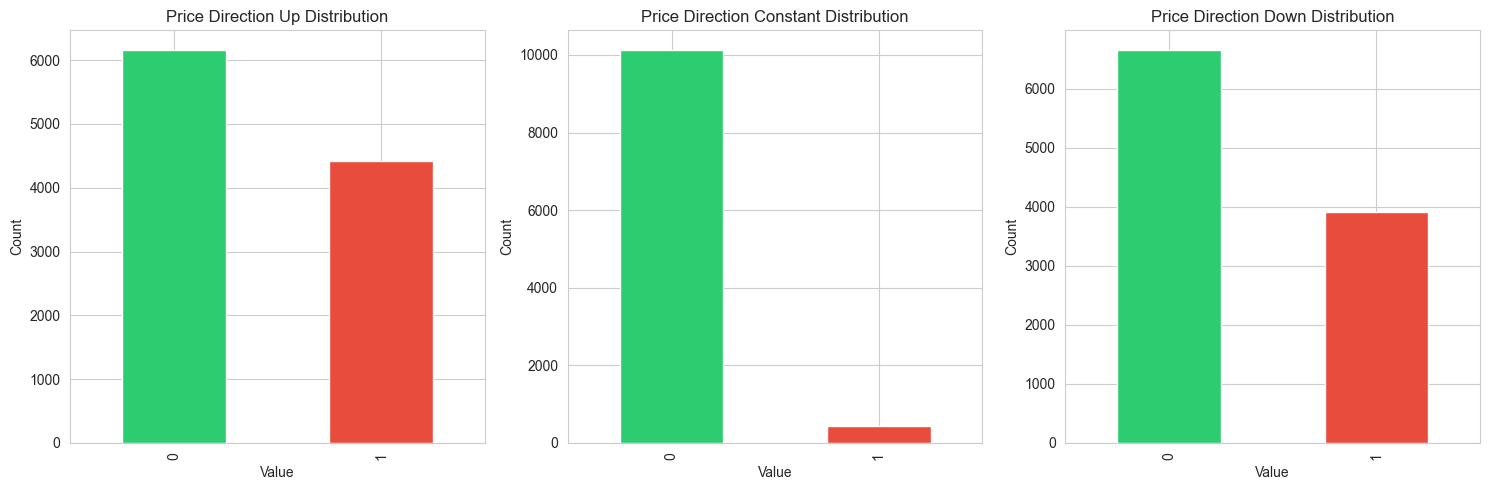

In [7]:
# Price direction distribution
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

price_cols = ['price_direction_up', 'price_direction_constant', 'price_direction_down']
for idx, col in enumerate(price_cols):
    if col in df.columns:
        df[col].value_counts().plot(kind='bar', ax=axes[idx], color=['#2ecc71', '#e74c3c'])
        axes[idx].set_title(f'{col.replace("_", " ").title()} Distribution')
        axes[idx].set_xlabel('Value')
        axes[idx].set_ylabel('Count')

plt.tight_layout()
plt.show()

## Sentiment Analysis Distribution

In [8]:
# Price sentiment distribution
if 'price_sentiment' in df.columns:
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    df['price_sentiment'].value_counts().sort_index().plot(kind='bar', ax=ax, color='#3498db')
    ax.set_title('Price Sentiment Distribution')
    ax.set_xlabel('Sentiment')
    ax.set_ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Correlation Heatmap

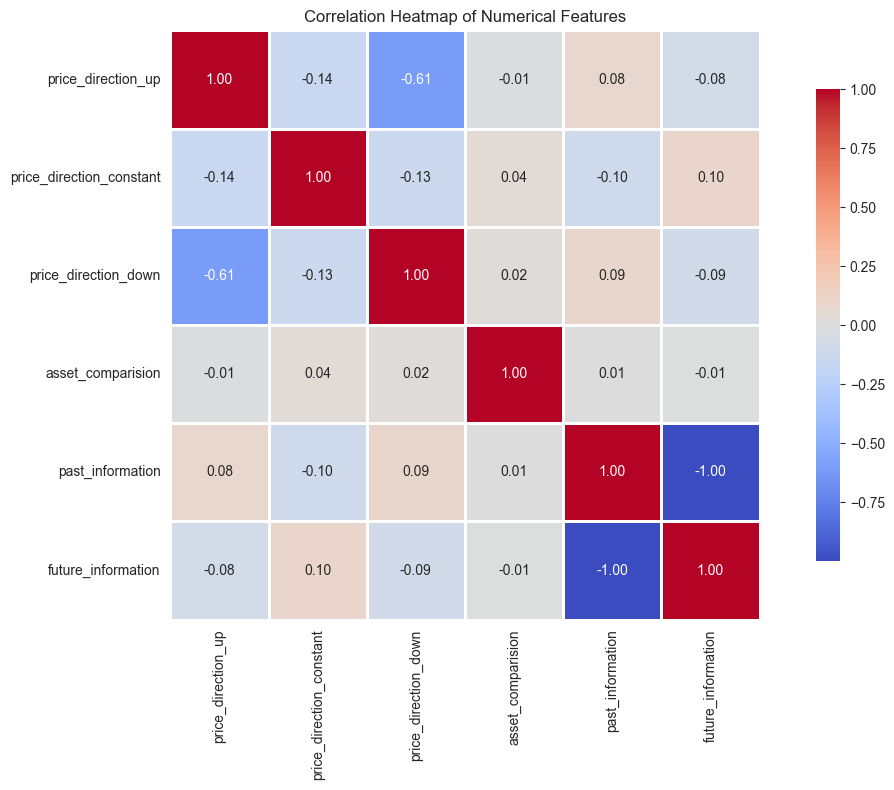

In [9]:
# Correlation matrix for numerical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 0:
    plt.figure(figsize=(12, 8))
    correlation = df[numeric_cols].corr()
    sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', center=0,
                square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Heatmap of Numerical Features')
    plt.tight_layout()
    plt.show()

## News Text Length Analysis

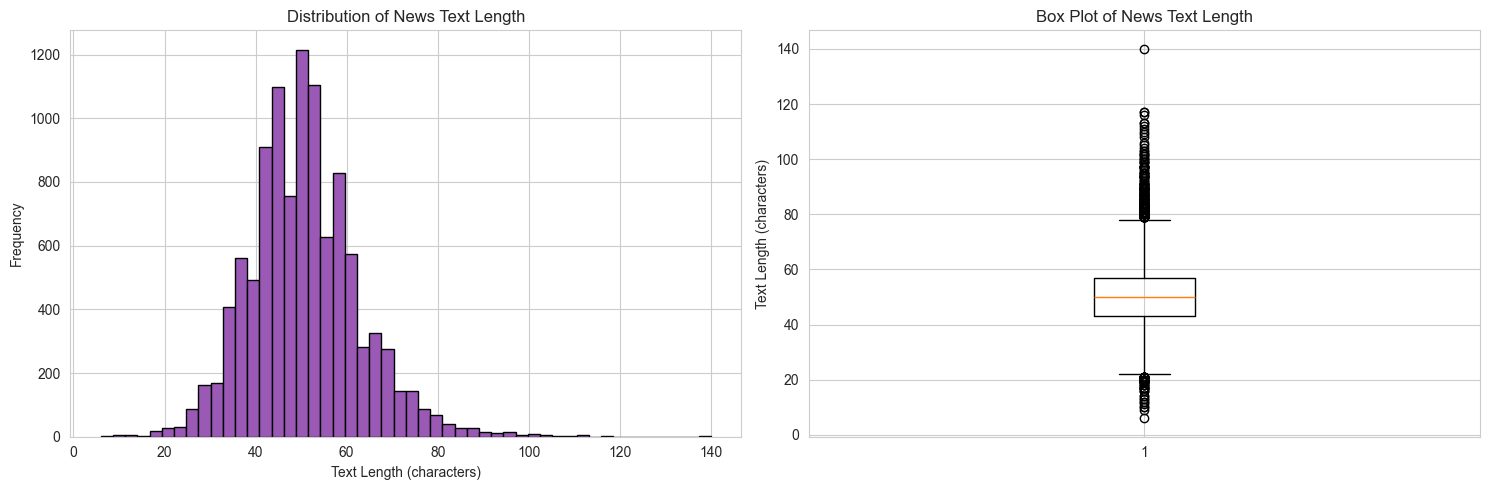

Mean news length: 50.63
Median news length: 50.00


In [10]:
# Text length distribution
if 'news' in df.columns:
    df['news_length'] = df['news'].astype(str).apply(len)
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Histogram
    axes[0].hist(df['news_length'], bins=50, color='#9b59b6', edgecolor='black')
    axes[0].set_title('Distribution of News Text Length')
    axes[0].set_xlabel('Text Length (characters)')
    axes[0].set_ylabel('Frequency')
    
    # Box plot
    axes[1].boxplot(df['news_length'], vert=True)
    axes[1].set_title('Box Plot of News Text Length')
    axes[1].set_ylabel('Text Length (characters)')
    
    plt.tight_layout()
    plt.show()
    
    print(f"Mean news length: {df['news_length'].mean():.2f}")
    print(f"Median news length: {df['news_length'].median():.2f}")

## Feature Relationships

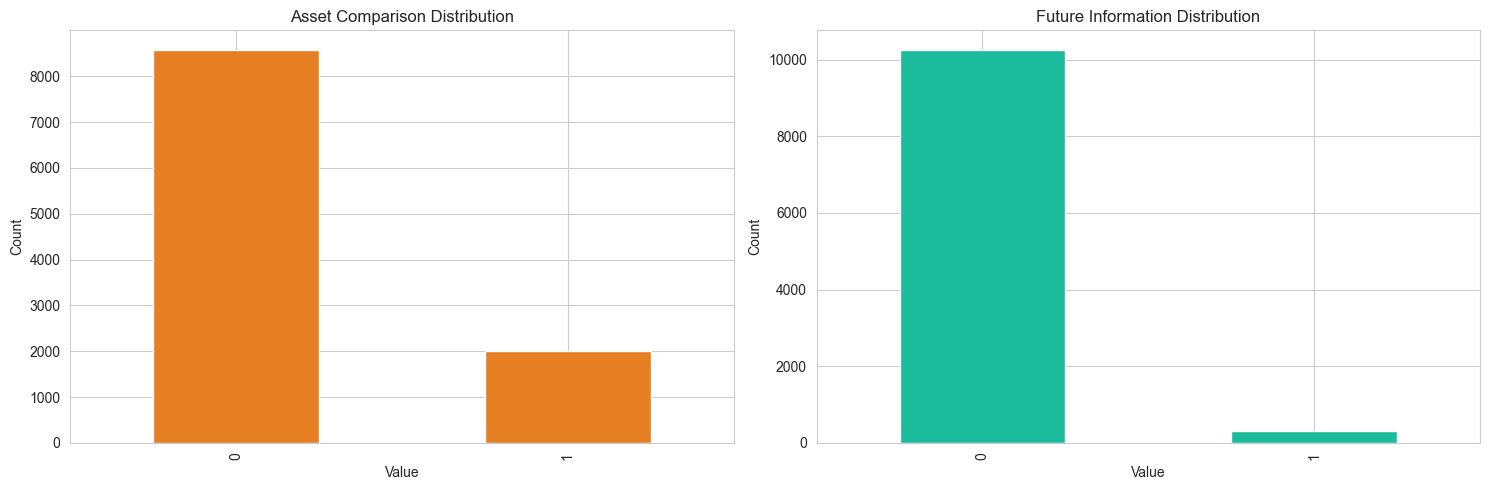

In [11]:
# Asset comparison and future information distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

if 'asset_comparision' in df.columns:
    df['asset_comparision'].value_counts().plot(kind='bar', ax=axes[0], color='#e67e22')
    axes[0].set_title('Asset Comparison Distribution')
    axes[0].set_xlabel('Value')
    axes[0].set_ylabel('Count')

if 'future_information' in df.columns:
    df['future_information'].value_counts().plot(kind='bar', ax=axes[1], color='#1abc9c')
    axes[1].set_title('Future Information Distribution')
    axes[1].set_xlabel('Value')
    axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

## Summary Statistics

In [12]:
# Summary statistics
print("=== Summary Statistics ===\n")
print(df.describe(include='all'))

=== Summary Statistics ===

                                                   news  price_direction_up  \
count                                             10570        10570.000000   
unique                                            10570                 NaN   
top     december gold down $1 at $749 an ounce on nymex                 NaN   
freq                                                  1                 NaN   
mean                                                NaN            0.417408   
std                                                 NaN            0.493155   
min                                                 NaN            0.000000   
25%                                                 NaN            0.000000   
50%                                                 NaN            0.000000   
75%                                                 NaN            1.000000   
max                                                 NaN            1.000000   

        price_direction